<a href="https://colab.research.google.com/github/LuisaSilveira/Projeto-de-Engenharia-/blob/main/ENG_1111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
from google.colab import drive

#lendo o arquivo de respostas do drive
drive.mount('/drive')

respostas = pd.read_csv("/drive/MyDrive/ENG1111/respostas_true2.txt")

respostas.head()


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


,Carimbo de data/hora,Idade,Gênero,Qual seu curso?,Faculdade:,Período: (em números),Coeficiente de rendimento: (CR),Estado civil:,Você tem/já teve algum problema de saúde mental?,Você tem ou já teve depressão?,Você tem ou já teve ansiedade?,Você tem ou já teve ataque de pânico?,Utiliza algum medicamento psiquiátrico?\n,Conta com acompanhamento psicológico/psiquiátrico?,O quão bem você se sente no cotidiano?
0,10/11/2022 13:40:14,19,Masculino,Engenharia,Souza Marques,14,3.5,Casado,Não sei,Sim,Sim,Sim,Sim,Sim,10
1,10/11/2022 13:43:51,20,Masculino,Economia,UFRJ,15,5.8,Em união estável,Não sei,Não,Não,Não,Não,Não,2
2,10/11/2022 14:36:36,19,Masculino,Engenharia,PUC,2,6.7,Solteiro,NaN,Não,Não,Não,Não,Não,9
3,10/11/2022 14:48:59,18,Masculino,Engenharia,PUC,2,7.0,Solteiro,NaN,Não,Não,Não,Não,Não,8
4,10/11/2022 14:49:15,18,Masculino,Engenharia,PUC,2,6.6,Solteiro,NaN,Não,Não,Não,Não,Não,8


In [ ]:
respostas.columns = ['dateTime','idade', 'gen', 'curso', 'facul', 'peri', 'cr','ec', 'ja teve','dep','ans','pan','med','acomp', 'sent']


#limpando valores inúteis;
respostas.drop(['ja teve','dateTime'],inplace =True, axis =1)


#agrupando CRs
respostas.cr = pd.cut(respostas['cr'], bins = [2,4,6,8,10], labels = [ 'baixo', 'medio', 'alto', 'muito alto'])

respostas.head(10)


,idade,gen,curso,facul,peri,cr,ec,dep,ans,pan,med,acomp,sent
0,19,Masculino,Engenharia,Souza Marques,14,baixo,Casado,Sim,Sim,Sim,Sim,Sim,10
1,20,Masculino,Economia,UFRJ,15,medio,Em união estável,Não,Não,Não,Não,Não,2
2,19,Masculino,Engenharia,PUC,2,alto,Solteiro,Não,Não,Não,Não,Não,9
3,18,Masculino,Engenharia,PUC,2,alto,Solteiro,Não,Não,Não,Não,Não,8
4,18,Masculino,Engenharia,PUC,2,alto,Solteiro,Não,Não,Não,Não,Não,8
5,20,Masculino,Engenharia,PUC,2,alto,Solteiro,Não,Não,Não,Não,Não,7
6,19,Masculino,Engenharia,PUC,2,alto,Solteiro,Não,Não,Sim,Não,Não,7
7,18,Feminino,Engenharia,PUC,2,medio,Solteiro,Não,Sim,Sim,Não,Não,6
8,19,Feminino,Engenharia,PUC,2,muito alto,Solteiro,Não,Não,Não,Não,Não,9
9,19,Masculino,Engenharia,PUC,4,alto,Solteiro,Não,Não,Não,Não,Não,5


In [ ]:
def abrevia(coluna, cutoff):
    mapa = dict()
    for i in range(len(coluna)):
        if coluna.values[i] >= cutoff:
            mapa[coluna.index[i]] = coluna.index[i]
        else:
            mapa[coluna.index[i]] = 'Outro'
    return mapa

mapaFacul =  abrevia(respostas.facul.value_counts(), 6)
respostas.facul = respostas.facul.map(mapaFacul)

mapaCursos = abrevia(respostas.curso.value_counts(),8)
respostas.curso = respostas.curso.map(mapaCursos)

print(respostas.facul.value_counts().index)
print(respostas.curso.value_counts().index)
respostas.head()

Index(['PUC', 'Outro', 'UFRJ', 'UFF', 'Estácio'], dtype='object')
Index(['Engenharia', 'Outro', 'Medicina', 'Direito', 'Psicologia'], dtype='object')


,idade,gen,curso,facul,peri,cr,ec,dep,ans,pan,med,acomp,sent
0,19,Masculino,Engenharia,Outro,14,baixo,Casado,Sim,Sim,Sim,Sim,Sim,10
1,20,Masculino,Outro,UFRJ,15,medio,Em união estável,Não,Não,Não,Não,Não,2
2,19,Masculino,Engenharia,PUC,2,alto,Solteiro,Não,Não,Não,Não,Não,9
3,18,Masculino,Engenharia,PUC,2,alto,Solteiro,Não,Não,Não,Não,Não,8
4,18,Masculino,Engenharia,PUC,2,alto,Solteiro,Não,Não,Não,Não,Não,8


In [ ]:

#fazendo a coluna atencao (coluna que gostariamos de prever):


dSimNao = {'Sim':1,'Não':0}

respostas['dep'].replace(dSimNao, inplace = True)
respostas['ans'].replace(dSimNao, inplace = True)
respostas['pan'].replace(dSimNao, inplace = True)
respostas['med'].replace(dSimNao, inplace = True)
respostas['acomp'].replace(dSimNao, inplace = True)


respostas['atencao'] = (respostas.dep+respostas.ans+respostas.med)-(0.5*respostas.acomp)


respostas.atencao.value_counts()


 1.0    43
 0.0    36
 0.5    24
 2.0    19
 2.5    16
 1.5    15
-0.5     6
 3.0     1
Name: atencao, dtype: int64

In [ ]:
#TRANSFORMA EM CATEGORIAS PARA USAR CLASSIFICADORES

respostas.atencao = pd.cut(respostas.atencao, bins = 7, labels = ['Aluno não precisa de atenção aplicada (situação tranquila)','Recomenda-se observação (situação aparentemente calma)',
                                                           'Recomenda-se atenção aplicada (situação aparenta levemente conturbada','Recomenda-se a busca de atendimento (situação ruim)',
                                                           'Recomenda-se busca de ajuda psicologica(situação ruim)',
                                                           'Recomenda-se a priorização da saúde mental (situação péssima)','Necessidade urgente de auxílio psicológico (situação péssima)'])


respostas.atencao.value_counts()



Recomenda-se atenção aplicada (situação aparenta levemente conturbada    43
Aluno não precisa de atenção aplicada (situação tranquila)               42
Recomenda-se observação (situação aparentemente calma)                   24
Recomenda-se busca de ajuda psicologica(situação ruim)                   19
Recomenda-se a priorização da saúde mental (situação péssima)            16
Recomenda-se a busca de atendimento (situação ruim)                      15
Necessidade urgente de auxílio psicológico (situação péssima)             1
Name: atencao, dtype: int64

In [ ]:
#label encoding:

from sklearn.preprocessing import LabelEncoder


leFacul = LabelEncoder()
respostas.facul = leFacul.fit_transform(respostas.facul)
print('label encoder faculdades: ',respostas.facul.unique())

leCurso = LabelEncoder()
respostas.curso = leCurso.fit_transform(respostas.curso)
print('label encoder cursos: ', respostas.curso.unique())

leEc = LabelEncoder()
respostas.ec = leEc.fit_transform(respostas.ec)
print('label encoder estado civil: ', respostas.ec.unique())

leGen = LabelEncoder()
respostas.gen = leGen.fit_transform(respostas.gen)
print('label encoder genero: ', respostas.gen.unique())

leCr = LabelEncoder()
respostas.cr = leCr.fit_transform(respostas.cr)
print('label encoder CR: ', respostas.cr.unique())




print('dataframe para treinamento: \n', respostas.head())

label encoder faculdades:  [1 4 2 3 0]
label encoder cursos:  [1 3 2 0 4]
label encoder estado civil:  [0 1 2]
label encoder genero:  [1 0]
label encoder CR:  [1 2 0 3]
dataframe para treinamento: 
    idade  gen  curso  facul  peri  cr  ec  dep  ans  pan  med  acomp  sent  \
0     19    1      1      1    14   1   0    1    1    1    1      1    10   
1     20    1      3      4    15   2   1    0    0    0    0      0     2   
2     19    1      1      2     2   0   2    0    0    0    0      0     9   
3     18    1      1      2     2   0   2    0    0    0    0      0     8   
4     18    1      1      2     2   0   2    0    0    0    0      0     8   

                                             atencao  
0  Necessidade urgente de auxílio psicológico (si...  
1  Aluno não precisa de atenção aplicada (situaçã...  
2  Aluno não precisa de atenção aplicada (situaçã...  
3  Aluno não precisa de atenção aplicada (situaçã...  
4  Aluno não precisa de atenção aplicada (situaçã...  


In [ ]:
#preparando coluna a ser prevista:

from sklearn.model_selection import train_test_split

X = respostas.drop(['dep','ans','pan','med','sent', 'atencao'], axis = 1)
y = respostas['atencao']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)


MODELOS QUE NAO RODARAM:


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

#REGRESSÃO LINEAR:
from sklearn.linear_model import LinearRegression

linReg = LinearRegression()
linReg.fit(X_train,y_train)


pred1 = linReg.predict(X_test)


erro = np.sqrt(mean_squared_error(y_test, pred1))
erro

In [ ]:

#ARVORE DE DECISOES:
from sklearn.tree import DecisionTreeRegressor

decisionTree = DecisionTreeRegressor(random_state=0)
decisionTree.fit(X_train, y_train)

pred = decisionTree.predict(X_test)

erro = np.sqrt(mean_squared_error(y_test, pred))
erro


1.0487978126654594

In [ ]:

# REGRESSOR FOREST
from sklearn.ensemble import RandomForestRegressor

randForest = RandomForestRegressor(random_state=0)
randForest.fit(X_train, y_train)
pred = randForest.predict(X_test)



erro = np.sqrt(mean_squared_error(y_test, pred))
erro

0.9209013511449217

In [ ]:

from sklearn.neural_network import  MLPRegressor



mlpReg= MLPRegressor()
mlpReg.fit(X_train, y_train.values)
pred = mlpReg.predict(X_test)

print(f"A precisao do teste usando Classifier foi de {accuracy_score(y_test, pred)*100:.2f}% ")


MODELOS QUE RODARAM:

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier



mlpClas= MLPClassifier()
mlpClas.fit(X_train, y_train.values)
pred = mlpClas.predict(X_test)

print(f"PRECISAO MLP CLASSIFIER {accuracy_score(y_test, pred)*100:.2f}% ")


PRECISAO MLP CLASSIFIER 41.67% 


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.naive_bayes import GaussianNB

gaussNb = GaussianNB()
gaussNb.fit(X_train, y_train)

gaussPred = gaussNb.predict(X_test) #maior taxa de acerto

print(f"PRECISAO GAUSSIAN NB: {accuracy_score(y_test,gaussPred)*100:.2f}% ")

PRECISAO GAUSSIAN NB: 58.33% 


In [ ]:
from sklearn.tree import DecisionTreeClassifier 


decTreeClas = DecisionTreeClassifier()
decTreeClas.fit(X_train, y_train)

decTreePred = decTreeClas.predict(X_test)
print(f"PRECISAO DECISION TREE CLASSIFIER {accuracy_score(y_test, decTreePred)*100:.2f}% ")


PRECISAO DECISION TREE CLASSIFIER 18.75% 


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbClass = GradientBoostingClassifier()
gbClass.fit(X_train,y_train)

gbcPred = gbClass.predict(X_test)

print(f"PRECISAO GRADIENT BOOSTING CLASSIFIER {accuracy_score(y_test, gbcPred)*100:.2f}% ")


PRECISAO GRADIENT BOOSTING CLASSIFIER 18.75% 


In [ ]:
from sklearn.linear_model import LogisticRegression

logReg= LogisticRegression()
logReg.fit(X_train, y_train)

lRegPred = logReg.predict(X_test)
print(f"PRECISAO LOGISTIC REGRESSION {accuracy_score(y_test, lRegPred)*100:.2f}% ")

PRECISAO LOGISTIC REGRESSION 18.75% 


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Teste do modelo: 



In [ ]:
#SIMULANDO INPUT DO USUARIO:
X = np.array([[19,'Masculino','Engenharia','PUC',2,3,'Solteiro','Sim']])
X


array([['19', 'Masculino', 'Engenharia', 'PUC', '2', '3', 'Solteiro',
        'Sim']], dtype='<U21')

In [ ]:
#CONVERTENDO VALORES:
X[:,1] = leGen.transform(X[:,1])
X[:,2] = leCurso.transform(X[:,2])
X[:,3] = leFacul.transform(X[:,3])
X[:,6] = leEc.transform(X[:,6])
X[:,7] = dSimNao.get(X[0][7] )
X = X.astype(float)
X

array([[19.,  1.,  1.,  2.,  2.,  3.,  2.,  1.]])

In [ ]:
y_test = gaussNb.predict(X)
y_test

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['Recomenda-se observação (situação aparentemente calma)'],
      dtype='<U69')

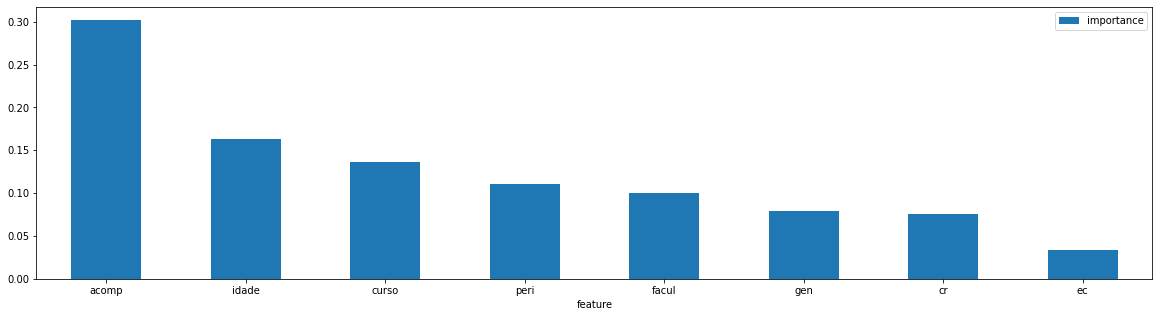

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(gbClass.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar(figsize=(20,5),rot = 0)


Salvando com o pickle para o site:

In [ ]:
import pickle 

data = {"modelo": gaussNb, "leGen": leGen,  "leCurso": leCurso, "leFacul": leFacul, "leEc": leEc}
with open('passos.pkl', 'wb') as file:
    pickle.dump(data, file)



In [ ]:
#pegando do arquivo
with open('passos.pkl', 'rb') as file:
    data = pickle.load(file)

modeloLoad = data['modelo']
leGen = data["leGen"]
leCurso = data['leCurso']
leFacul = data['leFacul']
leEc = data['leEc']


In [ ]:
y_test = modeloLoad.predict(X)
y_test

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['Recomenda-se observação (situação aparentemente calma)'],
      dtype='<U69')